<a href="https://colab.research.google.com/github/mojoyinkimberly/HeartDiseaseClassification/blob/main/HeartDiseaseClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**importing libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from imblearn.over_sampling import SMOTE

**reading dataset into environment**



In [ ]:
heart_dataset= pd.read_csv("/content/heart.csv", sep = ",")
heart_dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


**checking for missing values**

In [ ]:
heart_dataset.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

**line plot showing the relationship between age and heart disease;the older one gets, the higher the risk of having heart diseases**

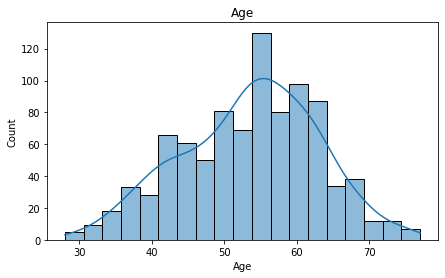

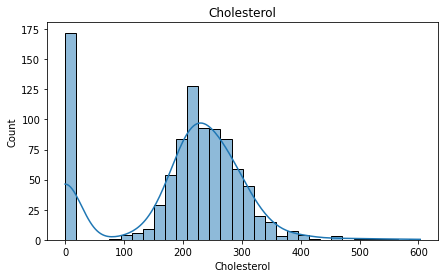

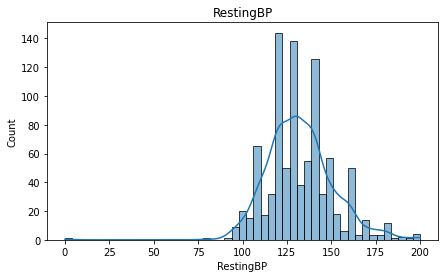

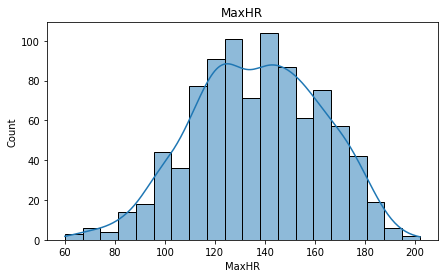

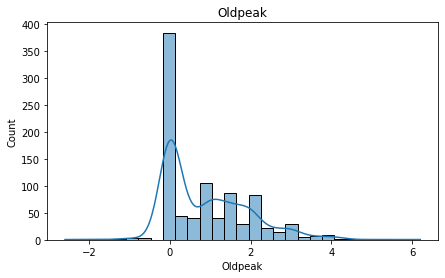

In [ ]:
for column in ['Age', 'Cholesterol','RestingBP', 'MaxHR','Oldpeak']:
    plt.figure(figsize=(7,4))
    sns.histplot(data=heart_dataset, x=column, kde=True)
    plt.title(column)
    plt.show()

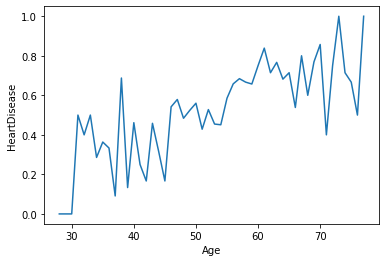

In [ ]:
sns.lineplot(x ='Age',y = 'HeartDisease',data = heart_dataset, ci = None)

**line plot that shows the relationship between age and heart disease for each gender**

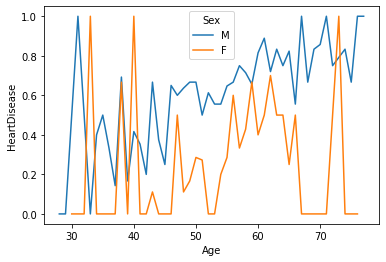

In [ ]:
sns.lineplot(x ='Age',y = 'HeartDisease',hue ='Sex',data = heart_dataset, ci = None)

**line plot that shows cholesterol level and how it could affect the human heart**

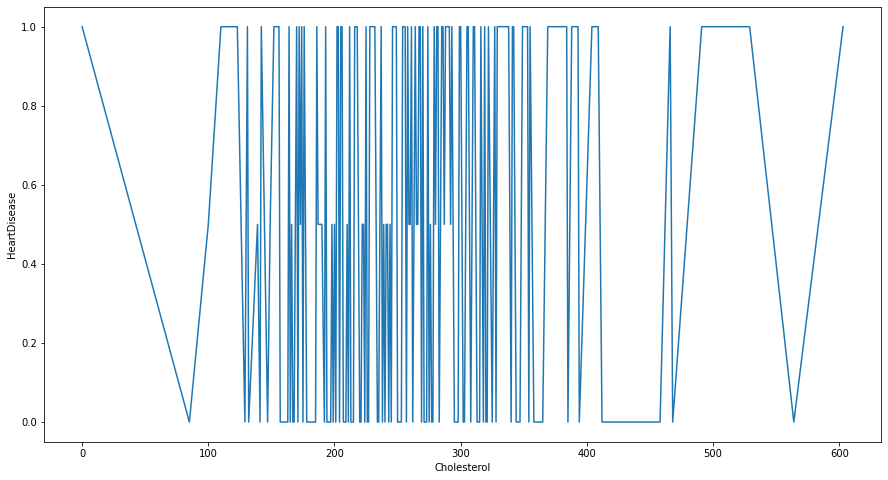

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(x='Cholesterol', y='HeartDisease', data = heart_dataset, ci = None, estimator = np.median)

**bar plot showing how fasting blood sugar affects the human heart**

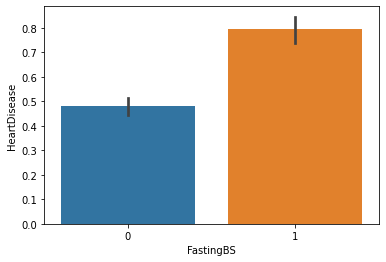

In [ ]:
sns.barplot(x ='FastingBS', y = 'HeartDisease', data = heart_dataset)

**bar plot showing the chest pain type and how it affects the human heart**

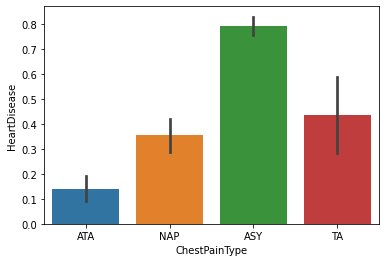

In [ ]:
sns.barplot(x='ChestPainType',y='HeartDisease', data = heart_dataset)

**line graph showing how the resting blood pressure could affect the heart**

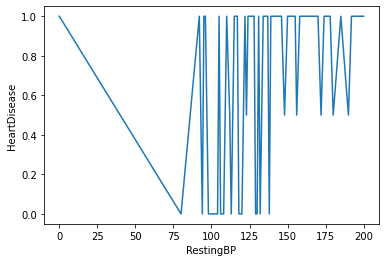

In [ ]:
sns.lineplot(x='RestingBP',y='HeartDisease',data = heart_dataset, ci=None, estimator = np.median)

**bar plot showing how the resting electrocardiogram affects the human heart**

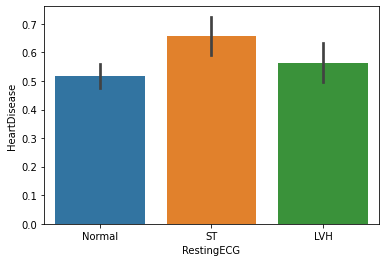

In [ ]:
sns.barplot(x='RestingECG',y='HeartDisease', data = heart_dataset)

**line graph showing how the maximum heart rate could affect the human heart**

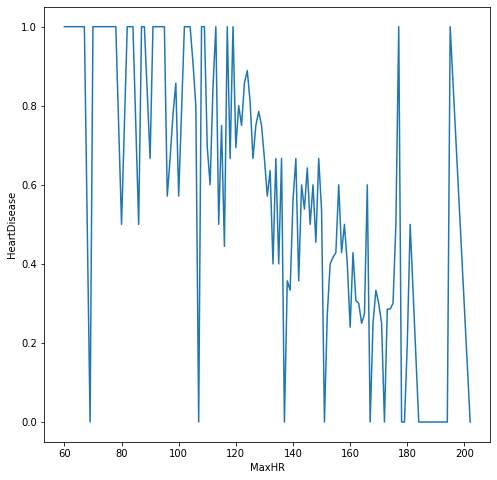

In [ ]:
plt.figure(figsize=(8,8))
sns.lineplot(x = 'MaxHR',y = 'HeartDisease',data = heart_dataset, ci=None)

**bar plot showing how exercise-induced angina could increase the risk of heart diseases**

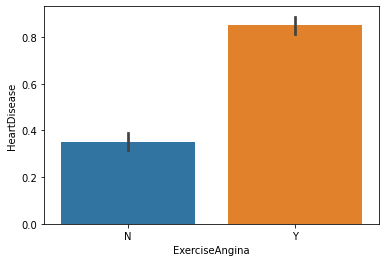

In [ ]:
sns.barplot(x='ExerciseAngina', y ='HeartDisease', data = heart_dataset)

**bar plot showing the relationship between the slope of the peak exercise ST segment and heart disease**

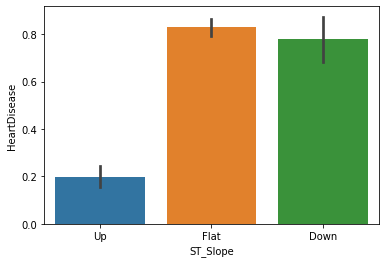

In [ ]:
sns.barplot(x = 'ST_Slope', y = 'HeartDisease', data = heart_dataset)

In [ ]:
heart_dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:

shape1 = heart_dataset.shape

for column in heart_dataset.select_dtypes(include="number").columns:
    q1 = heart_dataset[column].quantile(0.25)
    q3 = heart_dataset[column].quantile(0.75)
    iqr = q3-q1
    minimum = q1-(1.5*iqr)
    maximum = q3+(1.5*iqr)
    
    min_in = heart_dataset[heart_dataset[column] < minimum].index
    max_in = heart_dataset[heart_dataset[column] > maximum].index
    
    heart_dataset.drop(min_in, inplace=True)
    heart_dataset.drop(max_in, inplace=True)

shape2 = heart_dataset.shape

outliers = shape1[0] - shape2[0]

print("Total count of deleted outliers: ",outliers)

Total count of deleted outliers:  331


**checking for the relationship between and among the dependent and independent variables**

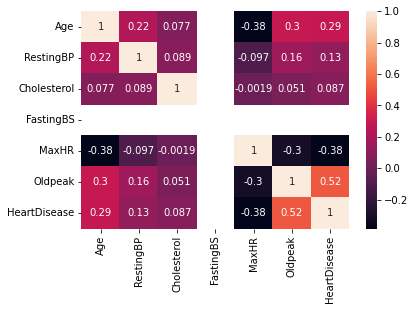

In [ ]:
sns.heatmap(heart_dataset.corr(), annot = True)

In [ ]:
encode = OrdinalEncoder()

heart_dataset[['maxhrtrate', 'restecg', 'exercise', 'st_slope', 'gender']] = encode.fit_transform(heart_dataset[['MaxHR', 'RestingECG', 'ExerciseAngina','ST_Slope', 'Sex']])

**splitting dataset into dependent and independent variables**

In [ ]:
y = heart_dataset['HeartDisease']
x = heart_dataset.drop(columns=['HeartDisease','Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'])


In [ ]:
y.value_counts()

0    337
1    250
Name: HeartDisease, dtype: int64

**From the above metrics it shows that our dependent dataset is not balance given that the total count for each categorical variable is not equally distributed which might lead to our model being bias**

**using smote to balance the dependent categories**

In [ ]:
sample = SMOTE(random_state = 45)
x, y = sample.fit_resample(x, y)

**The above SMOTE was done to balance our categorical dependent variable in other to avoid bias in our model**

**splitting dataset into test and train**

In [ ]:
X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state= 45) 

**normalizing data using the minmax scaler**

In [ ]:
normalizer = MinMaxScaler()
normed = pd.DataFrame(normalizer.fit_transform(X_train))

**splitting the normalized dataset into train and test for validation**

In [ ]:
X_train_,X_test_val,y_train_,y_test_val = train_test_split(normed,y_train,test_size=.25, random_state =1)

**using the principal component analysis to check for important features**

In [ ]:
pca = PCA(n_components=10)
pca_model = pca.fit(X_train_)
PCA(n_components = 10)


PCA(n_components=10)

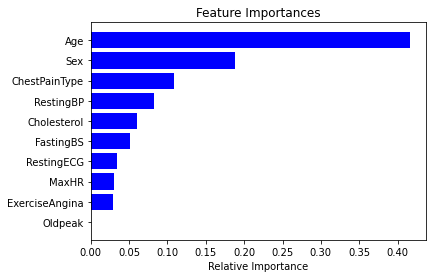

In [ ]:
features = heart_dataset.columns
importances = pca_model.explained_variance_ratio_
indices = np.argsort(importances)[-10:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**From our PCA decomposition it shows that the most important variable for classification are as shown in the above graph**

**fitting the training test into logistic regression model**

In [ ]:
 l_model = LogisticRegression()
 l_output = l_model.fit(X_train_,y_train_)

**predicting with the test**

In [ ]:
 y_predict = l_output.predict(X_test_val)

**using the confusion matrix to display the four quadrants that show the true and false positive and negative classes**

In [ ]:
confusion_matrix(y_test_val, y_predict)

array([[60,  7],
       [10, 58]])

**printing the precision,recall,and f1-score to determine how well the model has classified the dataset.**

In [ ]:
print(classification_report(y_test_val, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        67
           1       0.89      0.85      0.87        68

    accuracy                           0.87       135
   macro avg       0.87      0.87      0.87       135
weighted avg       0.87      0.87      0.87       135



**From the above classification report we can see that our model has 0.87 percent for predicting correctly numbers of patient that do not have heart disease and 0.88 percentage of patient that have heart disease with accuracy of 0.87.**

**checking for accuracy score**

In [ ]:
print("ac_score : ",accuracy_score(y_test_val, y_predict))

ac_score :  0.8740740740740741


**using the repeated k fold model to cross validate**

In [ ]:
Cv_ = RepeatedKFold(n_splits=10, n_repeats=4, random_state=1)
score = cross_val_score(l_output, X_test_val, y_test_val, scoring = "accuracy", cv = Cv_, n_jobs=1, error_score="raise")
np.mean(score)

0.8482142857142858

**The cross validation of our model shows that our model has 0.84 percentage of predicting correctly which is a good score given that our train and test score is not far away from each other.**

                                          **End of NoteBook**